# 08_1.Repeated Measures ANOVA
- https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html#pingouin.rm_anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 세션 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
rma_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/08_1.RMA.csv', encoding="cp949")
rma_df.head()

,id,시간,점수1,점수2,점수3
0,1,1,63,63,63
1,2,1,60,60,60
2,3,1,61,61,61
3,4,1,57,57,57
4,5,1,58,58,58


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
rma_df['시간'].replace({1:'사전점수', 2:'중간점수', 3:'최종점수'}, inplace=True)
rma_df['시간'] = rma_df['시간'].astype('category')

rma_df.head()

,id,시간,점수1,점수2,점수3
0,1,사전점수,63,63,63
1,2,사전점수,60,60,60
2,3,사전점수,61,61,61
3,4,사전점수,57,57,57
4,5,사전점수,58,58,58


### 2.3 자료구조 살펴보기

In [5]:
rma_df.shape

(135, 5)

In [6]:
rma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      135 non-null    int64   
 1   시간      135 non-null    category
 2   점수1     135 non-null    int64   
 3   점수2     135 non-null    int64   
 4   점수3     135 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.6 KB


In [7]:
rma_df.columns

Index(['id', '시간', '점수1', '점수2', '점수3'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
rma_df.groupby('시간')["점수1"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
시간,,,,,,,,
사전점수,45.0,60.200,3.216,53.0,58.0,60.0,63.0,67.0
중간점수,45.0,60.956,3.796,53.0,58.0,60.0,64.0,70.0
최종점수,45.0,60.644,2.451,53.0,59.0,61.0,62.0,66.0


In [9]:
# 분석변수가 여러개 일 때
num_feature = ['점수1', '점수2', '점수3']
for num in num_feature:
    print("----", num, "----")
    results = rma_df.groupby("시간")[num].describe().round(3)
    print(results, "\n")

---- 점수1 ----
      count    mean    std   min   25%   50%   75%   max
시간                                                      
사전점수   45.0  60.200  3.216  53.0  58.0  60.0  63.0  67.0
중간점수   45.0  60.956  3.796  53.0  58.0  60.0  64.0  70.0
최종점수   45.0  60.644  2.451  53.0  59.0  61.0  62.0  66.0 

---- 점수2 ----
      count    mean    std   min   25%   50%   75%   max
시간                                                      
사전점수   45.0  60.200  3.216  53.0  58.0  60.0  63.0  67.0
중간점수   45.0  60.956  3.796  53.0  58.0  60.0  64.0  70.0
최종점수   45.0  68.133  1.829  65.0  67.0  68.0  69.0  73.0 

---- 점수3 ----
      count    mean    std   min   25%   50%   75%   max
시간                                                      
사전점수   45.0  60.200  3.216  53.0  58.0  60.0  63.0  67.0
중간점수   45.0  60.956  3.796  53.0  58.0  60.0  64.0  70.0
최종점수   45.0  66.911  4.912  50.0  66.0  68.0  69.0  73.0 



## 4.ANOVA(RM)

### 4.1 구형성일때, 차이가 없을때

In [10]:
# 구형성일때, 차이가 없을때
# correction = False
pg.rm_anova(dv = '점수1',
            within = '시간',
            subject = "id",
            correction = False,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,시간,12.978,2,6.489,2.493,0.088,0.009,0.916
1,Error,229.022,88,2.603,NaN,NaN,NaN,NaN


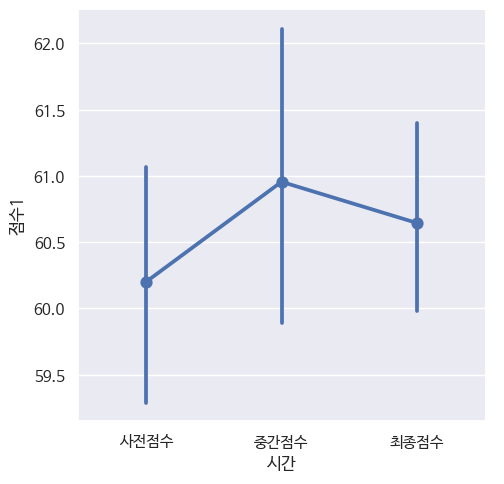

In [11]:
# 그래프
g = sns.catplot(x = "시간",
                y = "점수1",
                kind = "point",
                data = rma_df)

### 4.2 구형성일때, 차이가 있을때

#### 4.2.1 ANOVA(RM)

In [12]:
# 구형성일때, 차이가 있을때
# correction = False
pg.rm_anova(dv = '점수2',
            within = '시간',
            subject = "id",
            correction = False,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,시간,1725.437,2,862.719,264.93,0.0,0.583,0.956
1,Error,286.563,88,3.256,NaN,NaN,NaN,NaN


#### 4.2.2 사후분석(post-hoc, Multicom)

In [13]:
# post-hoc test(RMA)
pg.pairwise_tests(dv = '점수2',
                  within = '시간',
                  subject = "id",
                  data = rma_df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,시간,사전점수,중간점수,True,True,-1.994,44.0,two-sided,0.052,0.983,-0.213
1,시간,사전점수,최종점수,True,True,-23.038,44.0,two-sided,0.000,9.047e+22,-3.006
2,시간,중간점수,최종점수,True,True,-17.307,44.0,two-sided,0.000,1.456e+18,-2.389


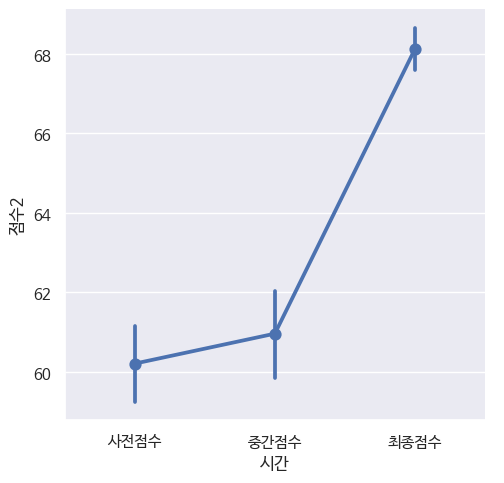

In [14]:
# 그래프
sns.catplot(x = "시간",
            y = "점수2",
            kind = "point",
            data = rma_df)

## 5.구형성 검정

### 5.1 구형성 검정

In [15]:
# 구형성이면 지금까지 분석한 것이 문제 없음
pg.sphericity(dv = '점수1',
              within = '시간',
              subject = "id",
              data = rma_df)

SpherResults(spher=True, W=0.9082850717962428, chi2=4.136470739071457, dof=2, pval=0.12640864956146516)

### 5.2 구형성이 아닐 때(Greenhouse-Geisser)

#### 5.2.1 ANOVA(Greenhouse-Geisser)

In [16]:
# 구형성이 아닐때: Greenhouse-Geisser corrected p-value
pg.sphericity(dv = '점수3',
              within = '시간',
              subject = "id",
              data = rma_df)

SpherResults(spher=False, W=0.5076989303880011, chi2=29.14826654385579, dof=2, pval=4.683109812153781e-07)

In [17]:
# 구형성이 아닐때: Greenhouse-Geisser corrected p-value
# correction = True
pg.rm_anova(dv = '점수3',
            within = '시간',
            subject = "id",
            correction = True,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,시간,1216.178,2,608.089,56.181,0.0,0.0,0.361,0.67,False,0.508,0.0
1,Error,952.489,88,10.824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5.2.2 구형성아닐때 사후분석(post-hoc, Multicom)

In [18]:
# post-hoc test(RMA)
pg.pairwise_tests(dv = '점수3',
                  within = '시간',
                  subject = "id",
                  data = rma_df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,시간,사전점수,중간점수,True,True,-1.994,44.0,two-sided,0.052,0.983,-0.213
1,시간,사전점수,최종점수,True,True,-8.362,44.0,two-sided,0.000,8.358e+07,-1.603
2,시간,중간점수,최종점수,True,True,-7.356,44.0,two-sided,0.000,3.487e+06,-1.345


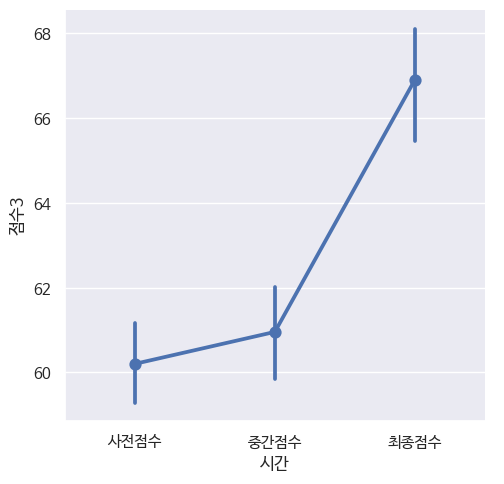

In [19]:
# 그래프
g = sns.catplot(x = "시간",
                y = "점수3",
                kind = "point",
                data = rma_df)

## 6.정규성 검정

### 6.1 정규분포 검정

In [20]:
## Python으로 검증하는 package 없음

### 6.2 비모수일때(friedman)

In [21]:
# friedman
pg.friedman(dv = '점수3',
            within = '시간',
            subject = "id",
            data = rma_df).round(3)

,Source,W,ddof1,Q,p-unc
Friedman,시간,0.594,2,53.491,0.0


In [22]:
# 구형성일때, 차이가 없을때
# correction = False
pg.rm_anova(dv = '점수3',
            within = '시간',
            subject = "id",
            correction = False,
            data = rma_df,
            detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,시간,1216.178,2,608.089,56.181,0.0,0.361,0.67
1,Error,952.489,88,10.824,NaN,NaN,NaN,NaN


In [23]:
# Non-parametric pairwise paired test (wilcoxon)
pg.pairwise_tests(dv = '점수3',
                  within = '시간',
                  subject = "id",
                  parametric = False,
                  data = rma_df).round(3)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,시간,사전점수,중간점수,True,False,146.5,two-sided,0.076,-0.213
1,시간,사전점수,최종점수,True,False,119.0,two-sided,0.000,-1.603
2,시간,중간점수,최종점수,True,False,124.0,two-sided,0.000,-1.345


## 7.검증결과 그래프

## 8.statsmodels 이용

In [24]:
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

res = AnovaRM(data = rma_df,
              depvar = '점수3',
              subject = 'id',
              within=['시간'])

print(res.fit())

             Anova
   F Value Num DF  Den DF Pr > F
--------------------------------
시간 56.1810 2.0000 88.0000 0.0000

